In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In  this notebook we will implement and explore correlation and covariance. Correlation is defined as $\frac{\sum Z_x Z_y}{n}$ where $Z_x$ and $Z_y$ are Z scores or in other words normalized x and y values. Here x and y are the two inputs we want to find correlation in between. n is the total number of samples. 

On the cell below we implement the Pearson's correlation or Pearson's R. Correlation shows if there is a linear relationship between two inputs.

In [2]:
def corr(x,y):
    n = x.shape[0]
    zx = (x - x.mean())/x.std() # normalization of x
    zy = (y - y.mean())/y.std() # normalization of y

    r = (zx*zy).sum()
    r = r / n
    
    return r

To test our implementation lets define a sine signal. Our signal is a sine function from 0 to $4\pi$ (360$^\circ$). Lets check this signals correlation with itself.

In [3]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20)) # to test our correlation implementation 
print(corr(signal1,signal1))

1.0


Correlation value is in the range of -1 to 1. The value of correlation depends on a couple of things. It shows how two inputs change with respect to each other: Do they increase or decrease at the same time? Since we computed this sine signals correlation with itself we expect it to be 1. Which mean high correlation.

Now lets define two different signals. Our first signal is the same sine function. Our second signal again the same signal of the first one but with 2 times amplitude.

In [4]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20)) 
signal2 = signal1 * 2

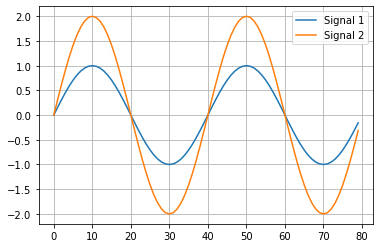

In [5]:
plt.plot(signal1)
plt.plot(signal2)
plt.grid()
plt.legend(["Signal 1","Signal 2"])
plt.show()

In [6]:
corr(signal1,signal2)

1.0

Again our correlation is 1. This is because correlation does not depend on the amplitude or the magnitude difference between the inputs.

Now lets shift our second signal in time. This will create a phase difference between two inputs.

In [7]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20))
signal2 = np.sin(np.arange(np.pi/4,np.pi*4.25,np.pi/20))

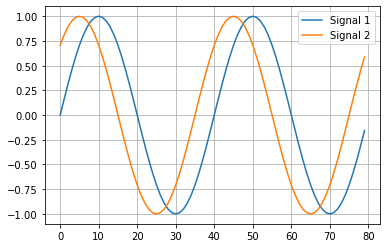

In [8]:
plt.plot(signal1)
plt.plot(signal2)
plt.grid()
plt.legend(["Signal 1","Signal 2"])
plt.show()

In [9]:
corr(signal1,signal2)

0.7071067811865474

Now we see that the correlation decreased. This is because the time shift we created. As we will shift the second signal through time the correlation will decrease.

Now lets look at the correlation of this sine function with its inverse or -sine.

In [10]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20))
signal2 = -np.sin(np.arange(0,np.pi*4,np.pi/20))

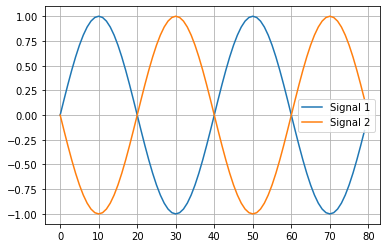

In [11]:
plt.plot(signal1)
plt.plot(signal2)
plt.grid()
plt.legend(["Signal 1","Signal 2"])
plt.show()

In [12]:
corr(signal1,signal2)

-1.0

Now we get negative correlation. Negative correlation does not mean there is no correlation. It means they are inversely correlated. As one signal increase the other decreases.

Now check the correlation of a sine and cosine signal.

In [13]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20))
signal2 = np.cos(np.arange(0,np.pi*4,np.pi/20))

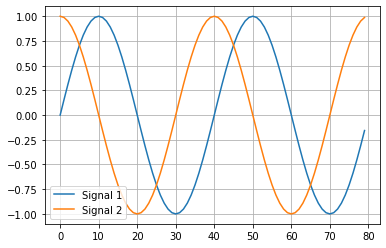

In [14]:
plt.plot(signal1)
plt.plot(signal2)
plt.grid()
plt.legend(["Signal 1","Signal 2"])
plt.show()

In [15]:
corr(signal1,signal2)

6.938893903907228e-18

We see that the correlation is zero meaning we can't find a linear relationship between these signals.

Now lets check the correlation between our sine signal and a random signal in the same range.

In [16]:
np.random.seed(6)
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20))
signal2 = 2*(np.random.rand(80)-0.5)

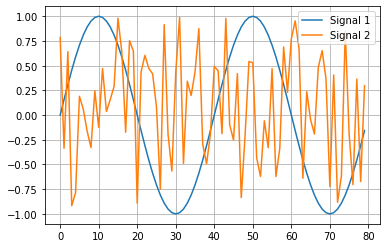

In [17]:
plt.plot(signal1)
plt.plot(signal2)
plt.grid()
plt.legend(["Signal 1","Signal 2"])
plt.show()

In [18]:
corr(signal1,signal2)

-0.04258404993442448

We see that the correlation is close to zero. This is expected because we use a random signal.

Now instead of a sine signal lets use a linear line.

In [19]:
x = np.arange(0,10,0.1)

y1 = 2 * x + 5
y2 = np.zeros(100) + 5.1
y3 = -2 * x + 5
y4 = np.random.rand(100)*25

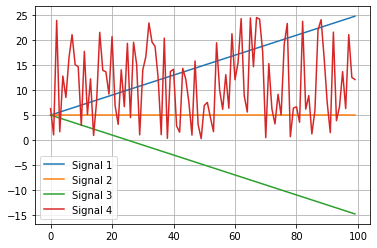

In [20]:
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)
plt.grid()
plt.legend(["Signal 1","Signal 2","Signal 3","Signal 4"])
plt.show()

In [21]:
print(corr(y1,y1))
print(corr(y1,y2))
print(corr(y1,y3))
print(corr(y1,y4))

0.9999999999999997
-3.1086244689504386e-17
-1.0
0.009424235136178351


You can see that the correlation values behave in the same way as it was in the sine inputs. 

In our previous examples we have shown a sine signal changing in time. Correlation does not have to be used with time related data. We will give one last example on correlation before moving on the covariance. We will use iris dataset and check corrrelation between features. 

In [22]:
data = pd.read_csv("./data/iris.csv")

Iris dataset consists of flower data. We will use petal length and petal width to check correlation. First we plot each sample. The data consist of 150 different flowers samples. So this is not a time related data. We put  petal length on x-axis and petal width on y-axis so that we can see how our features change with respect to each other. You can see that there is a linear relationship. (We can draw a line)

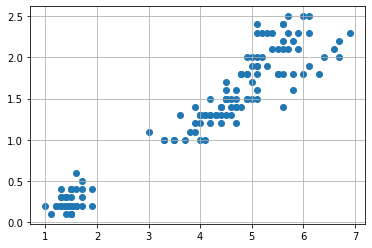

In [23]:
data = data [["petal_length","petal_width"]]
plt.scatter(data["petal_length"],data["petal_width"])
plt.grid()
plt.show()

In [24]:
corr(data["petal_length"],data["petal_width"])

0.9563387164039601

As it was expected from what we have seen on the plot we get a high correlation. Now lets move on to the covariance. Covariance is defined as $\frac{\sum (x - \overline{x})(y - \overline{y})}{n}$. Here x and y are our two inputs. $\overline{x}$ and $\overline{y}$ are mean values of x and y.

In [25]:
def cov(x,y):
    c = (x - x.mean())*(y - y.mean())
    c = c.mean()
    return c

In [26]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20))

Again using our sine function lets check covariance for different cases. We see that the covariance of the sine function with itself is 0.5. The covariance of the function with its negative is -0.5. Lastly covariance of the function with another sine function with 100 times its amplitude is 50.

In [27]:
print(cov(signal1,signal1))
print(cov(signal1,-signal1))
print(cov(signal1,signal1*100))
print(cov(signal1,signal1*200))

0.5
-0.5
50.0
100.0


From these values we see a couple of things. First covariance is not in a fixed range of -1 and 1. Unlike correlation range of inputs effect the range of output.

Now lets check two sine functions covariance which a phase difference.

In [28]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20))
signal2 = np.sin(np.arange(np.pi/4,np.pi*4.25,np.pi/20))

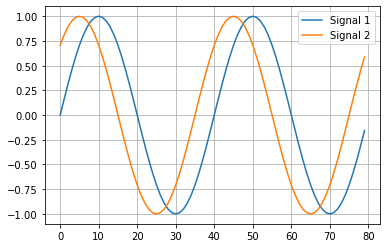

In [29]:
plt.plot(signal1)
plt.plot(signal2)
plt.grid()
plt.legend(["Signal 1","Signal 2"])
plt.show()

In [30]:
cov(signal1,signal2)

0.3535533905932737

As you can see we got a covariance less than 0.5 because of the time shift.

Lastly similar to correlation we can get 0 covariance when there is no linear relationship between the inputs.

In [31]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20))
signal2 = np.cos(np.arange(0,np.pi*4,np.pi/20))

In [32]:
cov(signal1,signal2)

3.469446951953614e-18

One last thing, you can see that correlation and covariance behave similarly. If you compare equations of  both you will see that correalation can also be written interms of covariance. Correlation can also be written as $\frac{cov(x,y)}{\sigma_x\sigma_y}$. If you replace the z-scores with their definition ($Z_x = \frac{x - \overline{x}}{\sigma_x}$) you can see the relationship bettter. Lets compute this to check it.

In [33]:
signal1 = np.sin(np.arange(0,np.pi*4,np.pi/20))
singal2 = np.sin(np.arange(np.pi/4,np.pi*4.25,np.pi/20))
print(cov(signal1,singal2)/(signal1.std()*singal2.std()))
print(corr(signal1,singal2))

0.7071067811865472
0.7071067811865474
